# Working with data 2017. Class 1 
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## 0. Structure
1. About Python
2. Data types, structures and code
3. Read csv files to dataframes
4. Basic operations with dataframes
5. My first plots
6. Debugging python
7. Summary 


In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

---

# 3. Reading files

# 4. Basic functions on dataframes
We will be using a very small dataset (data/class1_test_csv.csv)
- Uses TABS (\t) as separator: `sep="\t"`
- Does not have an index_col: `index_col=None`
- Has 4 rows at the start with comments: `skiprows=4`
- Uses "-9" as missing value: `na_values=["-9"]`
- The rest are the default options, so we don't need to write them

In [2]:
#First we reed our data
import pandas as pd
df = pd.read_csv("data/event.csv",sep="\t",header=None)
print(df.shape)
df.head()

(100000, 3)


,0,1,2
0,Mexico,50 events,2000
1,Mexico,31 events,2010
2,Canada,38 events,2010
3,Canada,40 events,2010
4,Mexico,16 events,2000


In [3]:
df.columns = ["country","events","year"]
df.head()

,country,events,year
0,Mexico,50 events,2000
1,Mexico,31 events,2010
2,Canada,38 events,2010
3,Canada,40 events,2010
4,Mexico,16 events,2000


## 4.2 Keeping columns

In [4]:
## Keep ONE column
df["events"].head()

0    50 events
1    31 events
2    38 events
3    40 events
4    16 events
Name: events, dtype: object

## 4.4 Keeping rows and columns (very useful) df.loc[condition,[columns]]

In [5]:
df.loc[df["year"]==2000, ["year","events"]].head()

,year,events
0,2000,50 events
4,2000,16 events
7,2000,115 events
10,2000,17 events
11,2000,20 events


## 4.12 Contingency tables

In [6]:
#Visualize contingency table
pd.crosstab(df["country"],df["year"])

year,2000,2010
country,,
Canada,14936,14920
Mexico,19937,20130
United States,15023,15054


In [7]:
#Visualize contingency table
pd.crosstab(df["country"],df["year"],normalize=True)

year,2000,2010
country,,
Canada,0.14936,0.14920
Mexico,0.19937,0.20130
United States,0.15023,0.15054


## 4.13 Replace

In [8]:
df.head()

,country,events,year
0,Mexico,50 events,2000
1,Mexico,31 events,2010
2,Canada,38 events,2010
3,Canada,40 events,2010
4,Mexico,16 events,2000


In [9]:
id2name = {"Mexico": "MX",
           "United States": "US"
}

df["Name_replace"] = df["country"].replace(id2name)
df["Name_map"] = df["country"].map(id2name)
df["Name_apply"] = df["country"].apply(id2name.get)
df.head()

,country,events,year,Name_replace,Name_map,Name_apply
0,Mexico,50 events,2000,MX,MX,MX
1,Mexico,31 events,2010,MX,MX,MX
2,Canada,38 events,2010,Canada,NaN,None
3,Canada,40 events,2010,Canada,NaN,None
4,Mexico,16 events,2000,MX,MX,MX


## 4.14 Apply

In [10]:
def get_number(string):
    """
    Get the number of events from a string with the format "XXX event"
    
    input: string containing "event"
    
    output: number of events
    """
    index_event = string.find("events")
    number_events = string[:index_event-1]
    return int(number_events)

In [11]:
#apply the function to a column
df["n_events"] = df["events"].apply(get_number)
df.head()

,country,events,year,Name_replace,Name_map,Name_apply,n_events
0,Mexico,50 events,2000,MX,MX,MX,50
1,Mexico,31 events,2010,MX,MX,MX,31
2,Canada,38 events,2010,Canada,NaN,None,38
3,Canada,40 events,2010,Canada,NaN,None,40
4,Mexico,16 events,2000,MX,MX,MX,16


## 4.5 Math operations II. Getting the logarithm
`A very typical transformation is to take the logarithm of a variable. This will convert right-skewed distribution to look more "normal"`

In [12]:
# To convert a variable (column) to logarithmic.
# Use base 10, because 0 = log(1), 1 = log(10), 2 = log(100).
df["log_n_events"] = np.log10(df["n_events"])
df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


,country,events,year,Name_replace,Name_map,Name_apply,n_events,log_n_events
0,Mexico,50 events,2000,MX,MX,MX,50,1.698970
1,Mexico,31 events,2010,MX,MX,MX,31,1.491362
2,Canada,38 events,2010,Canada,NaN,None,38,1.579784
3,Canada,40 events,2010,Canada,NaN,None,40,1.602060
4,Mexico,16 events,2000,MX,MX,MX,16,1.204120


**Important, when taking the logarithm of zero python creates an infinity value (np.inf)**

In [13]:
df["log_n_events"].describe()

count    1.000000e+05
mean             -inf
std               NaN
min              -inf
25%      1.204120e+00
50%      1.518514e+00
75%      1.812913e+00
max      3.481586e+00
Name: log_n_events, dtype: float64

**The best you can do is convert them into missing values**

In [14]:
df["log_n_events"] = df["log_n_events"].replace({np.inf:np.nan,
                                                 -np.inf:np.nan})
df["log_n_events"].describe()

count    99984.000000
mean         1.510380
std          0.448002
min          0.000000
25%          1.204120
50%          1.518514
75%          1.812913
max          3.481586
Name: log_n_events, dtype: float64

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


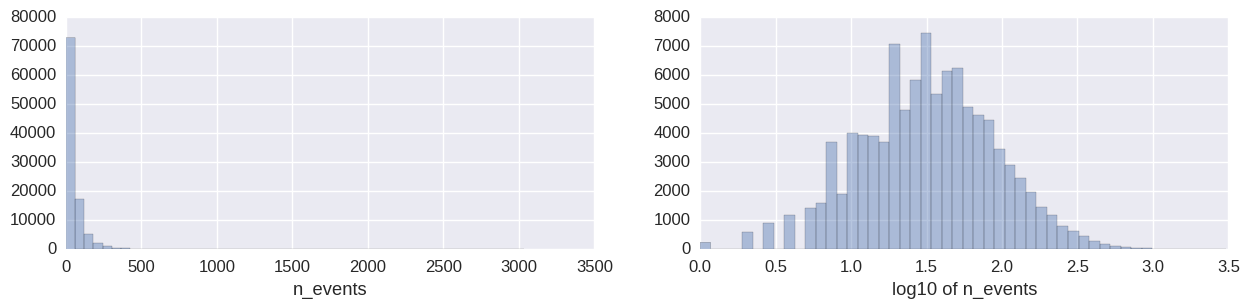

In [15]:
sns.set(font_scale=1.2)

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(df["n_events"],kde=False)

plt.subplot(1,2,2)
events = np.log10(df["n_events"])
#keep finite values
events = events[np.isfinite(events)]
sns.distplot(events,kde=False)

plt.xlabel("log10 of n_events")

## 4.15 str methods
You can use any method of a string (len, count, find, split, slice)

In [16]:
df.head()

,country,events,year,Name_replace,Name_map,Name_apply,n_events,log_n_events
0,Mexico,50 events,2000,MX,MX,MX,50,1.698970
1,Mexico,31 events,2010,MX,MX,MX,31,1.491362
2,Canada,38 events,2010,Canada,NaN,None,38,1.579784
3,Canada,40 events,2010,Canada,NaN,None,40,1.602060
4,Mexico,16 events,2000,MX,MX,MX,16,1.204120


In [17]:
#Length
df["events"].str.len().head()

0    9
1    9
2    9
3    9
4    9
Name: events, dtype: int64

In [18]:
#Slice
df["events"].str.slice(0,-7).head()

0    50
1    31
2    38
3    40
4    16
Name: events, dtype: object

In [19]:
#Count
df["events"].str.count("3").head()

0    0
1    1
2    1
3    0
4    0
Name: events, dtype: int64

In [20]:
#Replace
df["events"].str.replace("events","incidents").head()

0    50 incidents
1    31 incidents
2    38 incidents
3    40 incidents
4    16 incidents
Name: events, dtype: object

In [21]:
#Get all the numbers
df['events'].str.extract('(\d+)').astype(int).head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


0    50
1    31
2    38
3    40
4    16
Name: events, dtype: int64

## 4.16 Normalize a column to sum 100

In [22]:
df["Normalized events"] = 100*df["n_events"]/df["n_events"].sum()

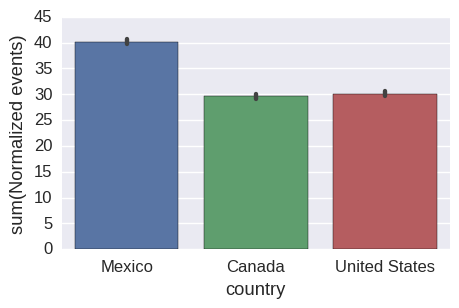

In [23]:
#Normalizing a column allows you to know the percentages by group
plt.figure(figsize=(5,3))
sns.barplot(x="country",y="Normalized events",data=df,estimator=sum)

## 4.15 Save file

In [24]:
#Save file into folder data
df.to_csv("data/events_copy.csv",sep="\t",index=None)

# 5. One way to make a scatter plot
Finally!
- We will use the libraries matplotlib and seaborn.
- seaborn makes beautiful plots. matplotlib is easier (and it's the base of seaborn).


In [25]:
#this tells the computer to plot everything here
%matplotlib inline 

#importing this library makes the default colors be beautiful
import seaborn as sns 

#this import matplotlib
import pylab as plt

In [26]:
#First we reed our data
import pandas as pd
df = pd.read_csv("../1_Python/data/class1_test_csv.csv",sep="\t",skiprows=4,na_values=["-9"])
df["happiness"] = [1,2,3,4,5,6,7,8,9,10,11,12]
df["events"] = [1,2,3,4,5,6,7,8,9,10,11,12]
df.head()

,person,year,treatment,score,happiness,events
0,1,2000,1,4.0,1,1
1,2,2000,1,3.0,2,2
2,3,2000,2,6.0,3,3
3,4,2000,2,4.0,4,4
4,1,2005,1,8.0,5,5


### 5.0 General idea
- When the dataset is tidy (long format) visualization is very easy

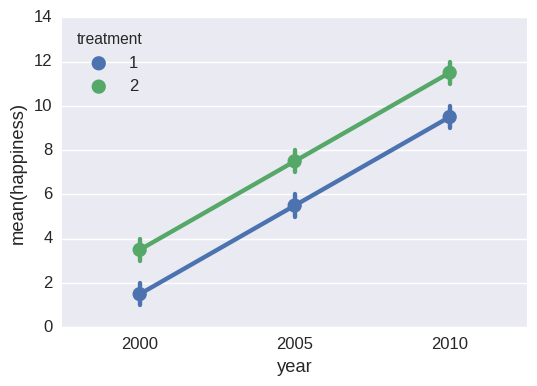

In [27]:
sns.pointplot(x="year",y="happiness",hue="treatment",data=df)

## 5.1 Basic commands

/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


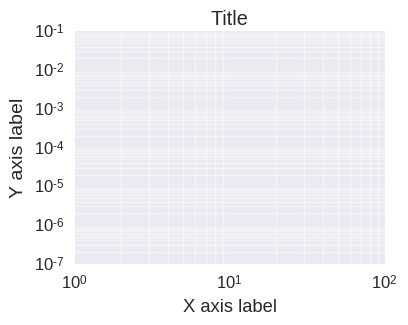

In [28]:
#create a figure with a size (measured in inches!)
plt.figure(figsize=(4,3)) 

#add a title to the figure
plt.title("Title")

#add a label in the x and y axis
plt.xlabel("X axis label")
plt.ylabel("Y axis label",fontsize=14) #we can add the font size to all the functions where we pass text

#add a legend (by default in seaborn)
plt.legend()

#use log scale in the x and y axis
plt.xscale("log")
plt.yscale("log")

#trim the x axis between 1 and 100 (to make it look like you want, it depends on your specific values)
plt.xlim((1,100))

#add minor ticks (vertical/horizontal lines) with tranparency 50%
plt.grid(which='minor',alpha=0.5)

#take out the grid
plt.grid(False)

#save the figure (I CAN'T STRESS ENOUGH: SAVE AS PDF FOR ANY PAPER YOU WRITE!)
plt.savefig("figures/name_of_figure.pdf") 

#show the figure (not required in jupyter notebooks but still good to write it)
plt.show()

#Change the size of all fonts
sns.set(font_scale=1.2) #20% larger fonts

#Take out the vertical or horizontal grid and adjust the axis of the figure (trim them)
sns.despine(trim=True)

#Important link with many options for the visualizations
#http://seaborn.pydata.org/tutorial/aesthetics.html

## 5.2 Scatter plot: plt.scatter(arguments)
Used to plot two quantitative variables against each other. We can add one extra quant. variable if we use bubble size and one qualitative if we use bubble color.

Important arguments:
- **x**: x values (an array)
- **y**: y values (an array)
- **c** (optional, default = "blue"): color (can be an array, or a string such as "blue")
- **s** (optional, default = 20): size (can be an array, or a number)
- **alpha** (optional, default = 1): transparency
- **edgecolor** (optional, default = "black"): "none" for none
- **cmap**: which colormap to use: http://matplotlib.org/examples/color/colormaps_reference.html
- **label**: label of the plot for the legend


In [29]:
plt.scatter?

In [30]:
df.head()

,person,year,treatment,score,happiness,events
0,1,2000,1,4.0,1,1
1,2,2000,1,3.0,2,2
2,3,2000,2,6.0,3,3
3,4,2000,2,4.0,4,4
4,1,2005,1,8.0,5,5


In [31]:
df = df.dropna()

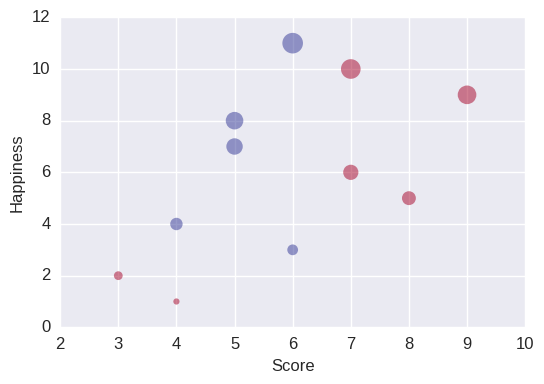

In [32]:
x = df["score"] #x values
y = df["happiness"] #y values
c = df["treatment"] #color
s = df["events"] #size

#Create a figure
plt.figure(figsize=(6,4)) 

#Make the scatter plot, using treatment as color, and events as size of the marker, 
#no edgecolor and a Red-Yellow-Blue colormap
plt.scatter(x,y,c=c,s=s*20,edgecolor="none",cmap="RdYlBu",alpha=0.5)
plt.xlabel("Score",fontsize=12)
plt.ylabel("Happiness",fontsize=12)
plt.show()

In [33]:
#A function to annotate a scatter plot
def annotate_scatter(x,y,label,data,fontsize=14):
    """
    Function to annotate a scatter plot
    
    Input:
    x: name of variable in x axis
    y: name of variable in y axis
    label: name of variable with the labels
    data: dataframe
    fontsize (default 14): font size
    
    """
       
    for label,x,y in zip(data[label],data[x],data[y]):
        plt.annotate(label,(x,y),fontsize=fontsize)

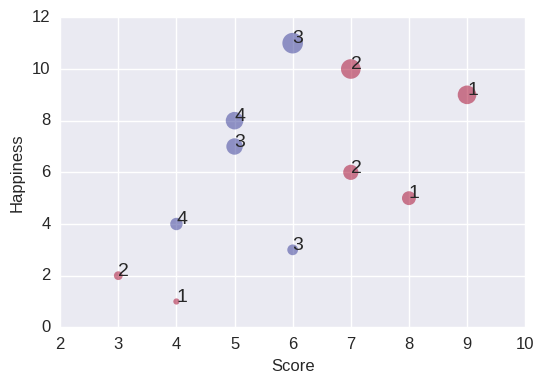

In [34]:
x = df["score"] #x values
y = df["happiness"] #y values
c = df["treatment"] #color
s = df["events"] #size

#Create a figure
plt.figure(figsize=(6,4)) 

#Make the scatter plot, using treatment as color, 80 as size of the marker, 
#no edgecolor and a Red-Yellow-Blue colormap
plt.scatter(x,y,c=c,s=s*20,edgecolor="none",cmap="RdYlBu",alpha=0.5)
annotate_scatter(x="score",y="happiness",label="person",data=df)
plt.xlabel("Score",fontsize=12)
plt.ylabel("Happiness",fontsize=12)
plt.show()

